In [1]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup 
url = "https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')
print(soup.prettify())


<!DOCTYPE html>
<html class="is-not-authenticated is-not-pro is-not-trial" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
  <script nonce="FlTMBgcOEz+Ej6MdGxLjHg==">
   window.initData = {};
  </script>
  <link href="https://s3.amazonaws.com" rel="dns-prefetch"/>
  <title>
   Sectors — Stock Market — USA — TradingView
  </title>
  <!-- { block personal_css_bundle } -->
  <!-- render_css_bundle('category_base') -->
  <!-- render_css_bundle('category') -->
  <link crossorigin="anonymous" href="https://static.tradingview.com/static/bundles/8348.85a46f1fadf76e279382.css" rel="stylesheet" type="text/css"/>
  <link crossorigin="anonymous" href="https://static.tradingview.com/static/bundles/3086.9f89937410e2bf27786b.css" rel="stylesheet" type="text/css"/>
  <link crossorigin="anonymous" href="https://static.tradingview.com/static/bundles/72066.f1aaa4b56bfc5

In [2]:
print(soup.title.string)

Sectors — Stock Market — USA — TradingView


In [3]:
all_sectors_tables = soup.find("table", class_="tv-data-table tv-screener-table")
print(all_sectors_tables)
print (all_sectors_tables.prettify())

<table class="tv-data-table tv-screener-table">
<thead class="tv-data-table__thead tv-screener-table__thead tv-screener-table__thead--sticky">
<tr class="tv-data-table__thead-row tv-data-table__stroke tv-screener-table__head">
<th class="tv-data-table__th tv-data-table__cell tv-data-table__sortable tv-screener-table__sortable tv-screener-table__th"> </th><th class="tv-data-table__th tv-data-table__cell tv-data-table__sortable tv-screener-table__sortable tv-screener-table__th"> </th><th class="tv-data-table__th tv-data-table__cell tv-data-table__sortable tv-screener-table__sortable tv-screener-table__th"> </th><th class="tv-data-table__th tv-data-table__cell tv-data-table__sortable tv-screener-table__sortable tv-screener-table__th"> </th><th class="tv-data-table__th tv-data-table__cell tv-data-table__sortable tv-screener-table__sortable tv-screener-table__th"> </th><th class="tv-data-table__th tv-data-table__cell tv-data-table__sortable tv-screener-table__sortable tv-screener-table__th"

In [4]:
rows = all_sectors_tables.find_all('tr')
for row in rows :
    cells = row.find_all('td')
    print('The number of cells/columns in row: ' + str(len(cells)))
    
    for cell in cells:
        if (cell.find(text = True)!= None):
            print('The contents of each column')
            print(cell.find(text=True))


The number of cells/columns in row: 0
The number of cells/columns in row: 9
The contents of each column


The contents of each column
1614.727B
The contents of each column
0.83
The contents of each column
-1.90%
The contents of each column
2.460M
The contents of each column
5
The contents of each column
248
The contents of each column
—
The number of cells/columns in row: 9
The contents of each column


The contents of each column
963.093B
The contents of each column
4.02
The contents of each column
-1.69%
The contents of each column
6.810M
The contents of each column
3
The contents of each column
56
The contents of each column
—
The number of cells/columns in row: 9
The contents of each column


The contents of each column
1474.649B
The contents of each column
0.96
The contents of each column
-4.30%
The contents of each column
34.515M
The contents of each column
8
The contents of each column
156
The contents of each column
—
The number of cells/columns in row: 9
The contents of each c

In [5]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []

rows = all_sectors_tables.find_all('tr')
for row in rows :
    cells = row.find_all('td')
    if len(cells)== 9:
        A.append(cells[0].text.strip()) 
        B.append(cells[1].find(text = True).text.strip())                        
        C.append(cells[2].find(text = True).text.strip())
        D.append(cells[3].find(text = True).text.strip())                      
        E.append(cells[4].find(text = True).text.strip())                        
        F.append(cells[5].find(text = True).text.strip())
        G.append(cells[6].find(text = True).text.strip())                      
        
        
        
        
        


    


In [6]:
import pandas 
df= pd.DataFrame(A, columns = ['SECTOR 20 MATCHES'])
df['MKT CAP'] = B
df['DIV YEILD FWD']= C
df['CHG %']= D
df['VOL']= E
df['INDUSTRIES']= F
df['STOCKS']= G
df


,SECTOR 20 MATCHES,MKT CAP,DIV YEILD FWD,CHG %,VOL,INDUSTRIES,STOCKS
0,Commercial Services,1614.727B,0.83,-1.90%,2.460M,5,248
1,Communications,963.093B,4.02,-1.69%,6.810M,3,56
2,Consumer Durables,1474.649B,0.96,-4.30%,34.515M,8,156
3,Consumer Non-Durables,3028.140B,2.59,-1.52%,3.158M,9,166
4,Consumer Services,1944.884B,1.07,-1.58%,3.982M,10,243
5,Distribution Services,477.624B,1.30,-1.64%,1.598M,4,83
6,Electronic Technology,6757.084B,1.19,-1.40%,22.681M,9,359
7,Energy Minerals,2722.803B,6.86,-2.59%,5.807M,4,113
8,Finance,9490.352B,2.46,-2.33%,3.581M,14,2161
9,Health Services,1150.635B,0.96,-0.49%,1.056M,4,94


In [7]:
df.to_csv('CSC221-webscrape-data.csv')
          

In [60]:
# 1. Use Pandas read_csv to read the data from file Marketing Raw Data.csv into variable raw_data
# 2. Display the shape of the raw_data DataFrame.
# 3. Display the first 5 rows of the DataFrame [HINT: Remember the .head() method]

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

raw_data = pd.read_csv("CSC221-webscrape-data.csv")

# Display number of rows and columns
print(pd.DataFrame(raw_data).shape)

# Display the top 20 records
raw_data.head(20)

(20, 8)


,Unnamed: 0,SECTOR 20 MATCHES,MKT CAP,DIV YEILD FWD,CHG %,VOL,INDUSTRIES,STOCKS
0,0,Commercial Services,1614.727B,0.83,-1.90%,2.460M,5,248
1,1,Communications,963.093B,4.02,-1.69%,6.810M,3,56
2,2,Consumer Durables,1474.649B,0.96,-4.30%,34.515M,8,156
3,3,Consumer Non-Durables,3028.140B,2.59,-1.52%,3.158M,9,166
4,4,Consumer Services,1944.884B,1.07,-1.58%,3.982M,10,243
5,5,Distribution Services,477.624B,1.30,-1.64%,1.598M,4,83
6,6,Electronic Technology,6757.084B,1.19,-1.40%,22.681M,9,359
7,7,Energy Minerals,2722.803B,6.86,-2.59%,5.807M,4,113
8,8,Finance,9490.352B,2.46,-2.33%,3.581M,14,2161
9,9,Health Services,1150.635B,0.96,-0.49%,1.056M,4,94


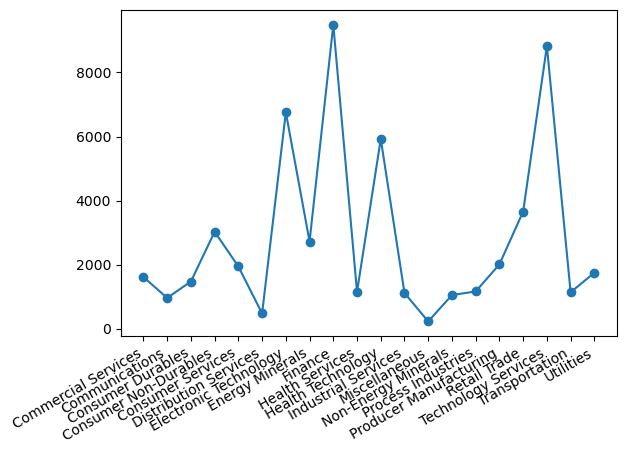

In [64]:
x = np.array(raw_data["MKT CAP"])
y = np.array(raw_data["SECTOR 20 MATCHES"])

# print(x)
# print(y)

# Code to remove market-cap-unit from the value. For example, MKT CAP 1614.727B becomes 1614.727
x1 = []
for i in x:
    leng = len(i)
    i = i[0:leng-1]
    x1.append(float(i))

# Display "SECTOR 20 MATCHES" in x-axis and corresponding "MKT CAP" in billions in y-axis
fig, ax = plt.subplots()
ax.plot_date(y, x1, linestyle='-')

fig.autofmt_xdate()
plt.show()